/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_10694/3275710744.py:111: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/muntazirabidi/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


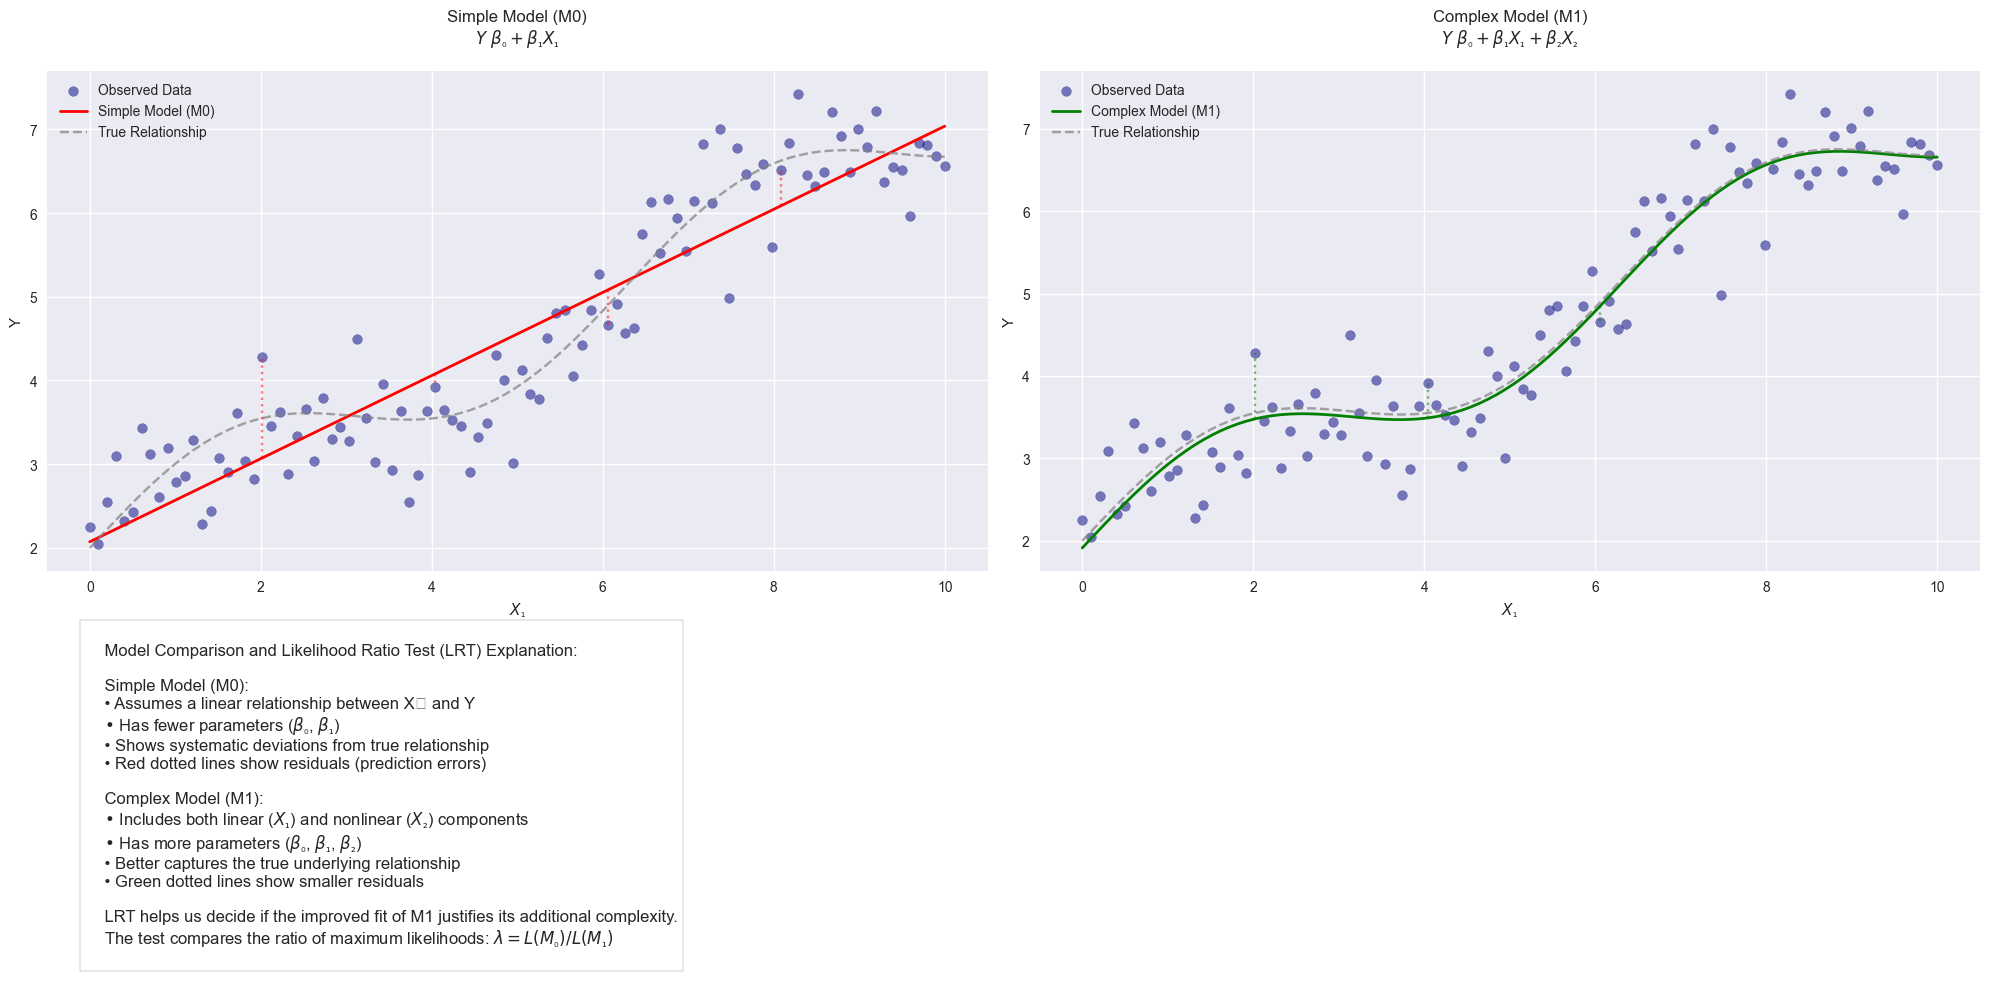

Font 'default' does not have a glyph for '\u2080' [U+2080], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2080' [U+2080], substituting with a dummy symbol.


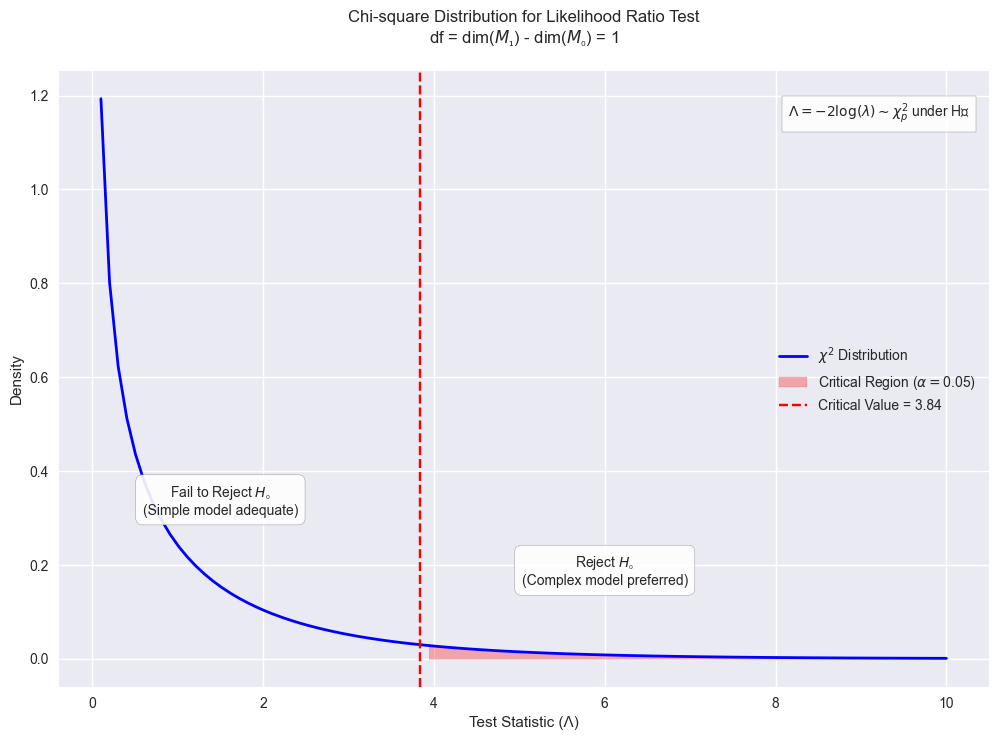

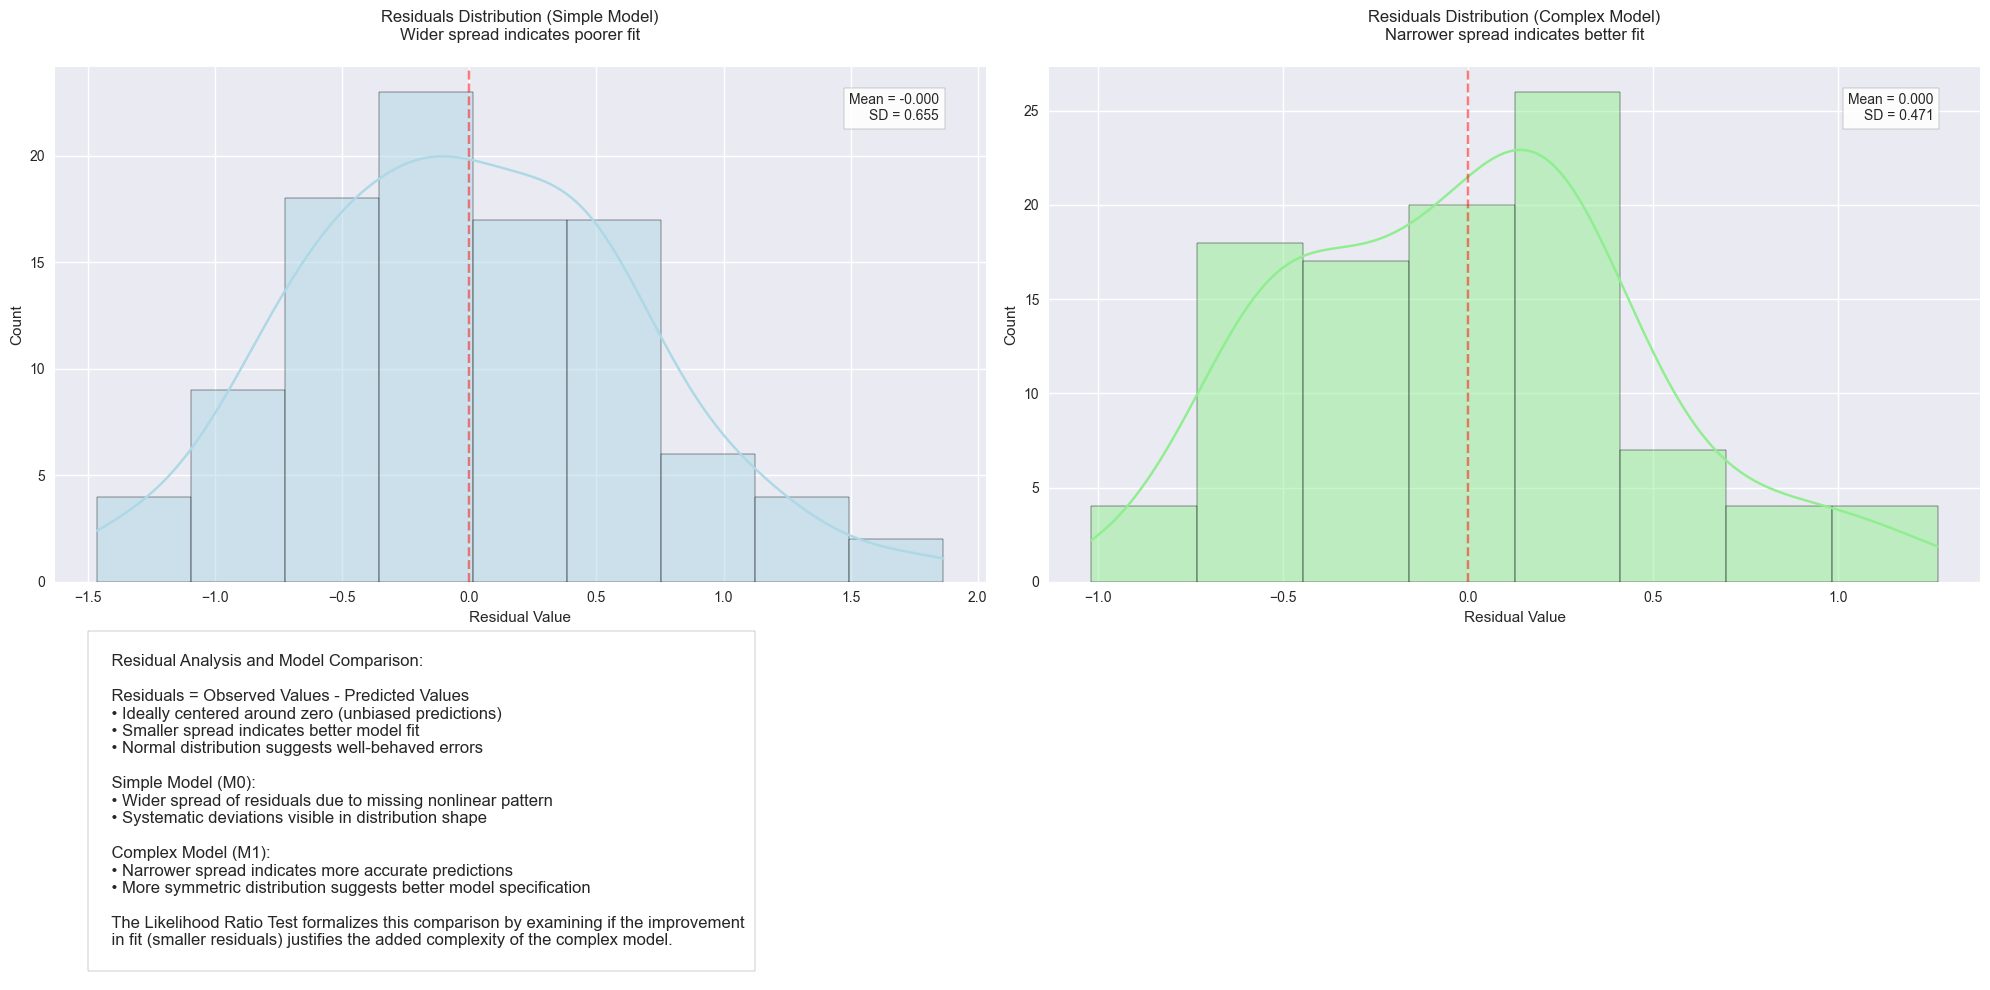

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Set style and random seed for reproducibility
plt.style.use("seaborn-v0_8")
np.random.seed(42)

def create_educational_data(n_points=100):
    """
    Creates synthetic data to demonstrate difference between simple and complex models.
    The data follows a nonlinear pattern that a simple linear model won't capture well.
    """
    # Generate evenly spaced X values
    X1 = np.linspace(0, 10, n_points)
    
    # Create nonlinear component (X2) using sine function
    # This creates a wave pattern that simple linear regression can't capture
    X2 = 2 * np.sin(X1)
    
    # Generate Y values with both linear and nonlinear components
    # Y = intercept + linear_component + nonlinear_component + random_noise
    true_function = 2 + 0.5 * X1 + 0.3 * X2
    noise = np.random.normal(0, 0.5, n_points)
    Y = true_function + noise
    
    return X1, X2, Y, true_function

def plot_model_comparison_detailed():
    """
    Creates an educational visualization comparing simple linear regression
    with a more complex model that includes nonlinear terms.
    """
    # Generate our synthetic data
    X1, X2, Y, true_function = create_educational_data()
    
    # Create figure with a grid layout
    # Top row will have model plots, bottom row will have explanatory text
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
    ax1 = fig.add_subplot(gs[0, 0])  # Simple model
    ax2 = fig.add_subplot(gs[0, 1])  # Complex model
    ax_text = fig.add_subplot(gs[1, :])  # Explanatory text
    
    # Fit simple linear model (M0)
    coeffs0 = np.polyfit(X1, Y, 1)
    Y_pred0 = np.polyval(coeffs0, X1)
    
    # Fit complex model (M1) using both X1 and X2
    X_complex = np.column_stack((X1, X2))
    coeffs1 = np.linalg.lstsq(np.column_stack((np.ones(100), X_complex)), Y, rcond=None)[0]
    Y_pred1 = coeffs1[0] + coeffs1[1] * X1 + coeffs1[2] * X2
    
    # Plot simple model with educational elements
    ax1.scatter(X1, Y, alpha=0.5, label='Observed Data', color='navy')
    ax1.plot(X1, Y_pred0, 'r-', label='Simple Model (M0)', linewidth=2)
    ax1.plot(X1, true_function, '--', color='gray', label='True Relationship', alpha=0.7)
    
    # Add residual lines for selected points to show prediction errors
    sample_indices = [20, 40, 60, 80]
    for i in sample_indices:
        ax1.vlines(x=X1[i], ymin=Y_pred0[i], ymax=Y[i], 
                  colors='red', linestyles=':', alpha=0.5)
    
    ax1.set_title('Simple Model (M0)\n$Y ~ β_₀ + β_₁X_₁$', pad=20)
    ax1.set_xlabel('$X_₁$')
    ax1.set_ylabel('Y')
    ax1.legend()
    
    # Plot complex model
    ax2.scatter(X1, Y, alpha=0.5, label='Observed Data', color='navy')
    ax2.plot(X1, Y_pred1, 'g-', label='Complex Model (M1)', linewidth=2)
    ax2.plot(X1, true_function, '--', color='gray', label='True Relationship', alpha=0.7)
    
    # Add residual lines for complex model
    for i in sample_indices:
        ax2.vlines(x=X1[i], ymin=Y_pred1[i], ymax=Y[i], 
                  colors='green', linestyles=':', alpha=0.5)
    
    ax2.set_title('Complex Model (M1)\n$Y ~ β_₀ + β_₁X_₁ + β_₂X_₂$', pad=20)
    ax2.set_xlabel('$X_₁$')
    ax2.set_ylabel('Y')
    ax2.legend()
    
    # Add educational explanation
    explanation = """
    Model Comparison and Likelihood Ratio Test (LRT) Explanation:
    
    Simple Model (M0):
    • Assumes a linear relationship between X₁ and Y
    • Has fewer parameters ($β_₀$, $β_₁$)
    • Shows systematic deviations from true relationship
    • Red dotted lines show residuals (prediction errors)
    
    Complex Model (M1):
    • Includes both linear ($X_₁$) and nonlinear ($X_₂$) components
    • Has more parameters ($β_₀$, $β_₁$, $β_₂$)
    • Better captures the true underlying relationship
    • Green dotted lines show smaller residuals
    
    LRT helps us decide if the improved fit of M1 justifies its additional complexity.
    The test compares the ratio of maximum likelihoods: $λ = L(M_₀)/L(M_₁)$
    """
    ax_text.axis('off')
    ax_text.text(0.02, 0.1, explanation, fontsize=12, 
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    plt.tight_layout()
    return fig

def plot_enhanced_chi_square():
    """
    Creates an educational visualization of the chi-square distribution
    used in Likelihood Ratio Tests, with detailed annotations.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Generate points for chi-square distribution
    x = np.linspace(0, 10, 100)
    df = 1  # degrees of freedom (difference in parameters between models)
    chi2_dist = stats.chi2.pdf(x, df)
    
    # Plot the distribution
    ax.plot(x, chi2_dist, 'b-', lw=2, label='$χ^2$ Distribution')
    
    # Add critical region for significance level α = 0.05
    alpha = 0.05
    critical_value = stats.chi2.ppf(1 - alpha, df)
    critical_x = x[x >= critical_value]
    critical_y = stats.chi2.pdf(critical_x, df)
    ax.fill_between(critical_x, critical_y, alpha=0.3, color='r',
                   label=f'Critical Region ($α=${alpha})')
    
    # Add critical value line
    ax.axvline(x=critical_value, color='r', linestyle='--',
               label=f'Critical Value = {critical_value:.2f}')
    
    # Add educational annotations
    ax.annotate('Fail to Reject $H_₀$\n(Simple model adequate)',
                xy=(1.5, 0.2), xytext=(1.5, 0.3),
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.9))
    
    ax.annotate('Reject $H_₀$\n(Complex model preferred)',
                xy=(6, 0.05), xytext=(6, 0.15),
                ha='center', va='bottom',
                bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.9))
    
    # Add mathematical formula
    formula = r'$\Lambda = -2\log(\lambda) \sim \chi^2_{p}$ under H₀'
    ax.text(0.98, 0.95, formula, transform=ax.transAxes,
            horizontalalignment='right', verticalalignment='top',
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    ax.set_title('Chi-square Distribution for Likelihood Ratio Test\ndf = dim($M_₁$) - dim($M_₀$) = 1', pad=20)
    ax.set_xlabel('Test Statistic (Λ)')
    ax.set_ylabel('Density')
    ax.legend()
    
    return fig

def plot_enhanced_residuals():
    """
    Creates an educational visualization of residuals distribution
    comparing simple and complex models.
    """
    # Generate data and fit models
    X1, X2, Y, _ = create_educational_data()
    
    # Calculate residuals for both models
    coeffs0 = np.polyfit(X1, Y, 1)
    Y_pred0 = np.polyval(coeffs0, X1)
    residuals0 = Y - Y_pred0
    
    X_complex = np.column_stack((X1, X2))
    coeffs1 = np.linalg.lstsq(np.column_stack((np.ones(100), X_complex)), Y, rcond=None)[0]
    Y_pred1 = coeffs1[0] + coeffs1[1] * X1 + coeffs1[2] * X2
    residuals1 = Y - Y_pred1
    
    # Create figure layout
    fig = plt.figure(figsize=(20, 10))
    gs = fig.add_gridspec(2, 2, height_ratios=[3, 1])
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax_text = fig.add_subplot(gs[1, :])
    
    # Plot residuals for simple model
    sns.histplot(residuals0, kde=True, ax=ax1, color='lightblue')
    ax1.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    ax1.set_title('Residuals Distribution (Simple Model)\nWider spread indicates poorer fit', pad=20)
    ax1.set_xlabel('Residual Value')
    ax1.set_ylabel('Count')
    
    # Add summary statistics
    stats_text0 = f'Mean = {np.mean(residuals0):.3f}\nSD = {np.std(residuals0):.3f}'
    ax1.text(0.95, 0.95, stats_text0, transform=ax1.transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    # Plot residuals for complex model
    sns.histplot(residuals1, kde=True, ax=ax2, color='lightgreen')
    ax2.axvline(x=0, color='red', linestyle='--', alpha=0.5)
    ax2.set_title('Residuals Distribution (Complex Model)\nNarrower spread indicates better fit', pad=20)
    ax2.set_xlabel('Residual Value')
    ax2.set_ylabel('Count')
    
    # Add summary statistics
    stats_text1 = f'Mean = {np.mean(residuals1):.3f}\nSD = {np.std(residuals1):.3f}'
    ax2.text(0.95, 0.95, stats_text1, transform=ax2.transAxes,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    # Add educational explanation
    explanation = """
    Residual Analysis and Model Comparison:
    
    Residuals = Observed Values - Predicted Values
    • Ideally centered around zero (unbiased predictions)
    • Smaller spread indicates better model fit
    • Normal distribution suggests well-behaved errors
    
    Simple Model (M0):
    • Wider spread of residuals due to missing nonlinear pattern
    • Systematic deviations visible in distribution shape
    
    Complex Model (M1):
    • Narrower spread indicates more accurate predictions
    • More symmetric distribution suggests better model specification
    
    The Likelihood Ratio Test formalizes this comparison by examining if the improvement 
    in fit (smaller residuals) justifies the added complexity of the complex model.
    """
    ax_text.axis('off')
    ax_text.text(0.02, 0.1, explanation, fontsize=12,
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    plt.tight_layout()
    return fig

# Generate all visualizations
fig1 = plot_model_comparison_detailed()
fig2 = plot_enhanced_chi_square()
fig3 = plot_enhanced_residuals()
plt.show()

/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_10694/3030937054.py:111: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_10694/3030937054.py:111: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fc/xqlqp1_91msbj5k907rjvrm80000gn/T/ipykernel_10694/3030937054.py:111: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


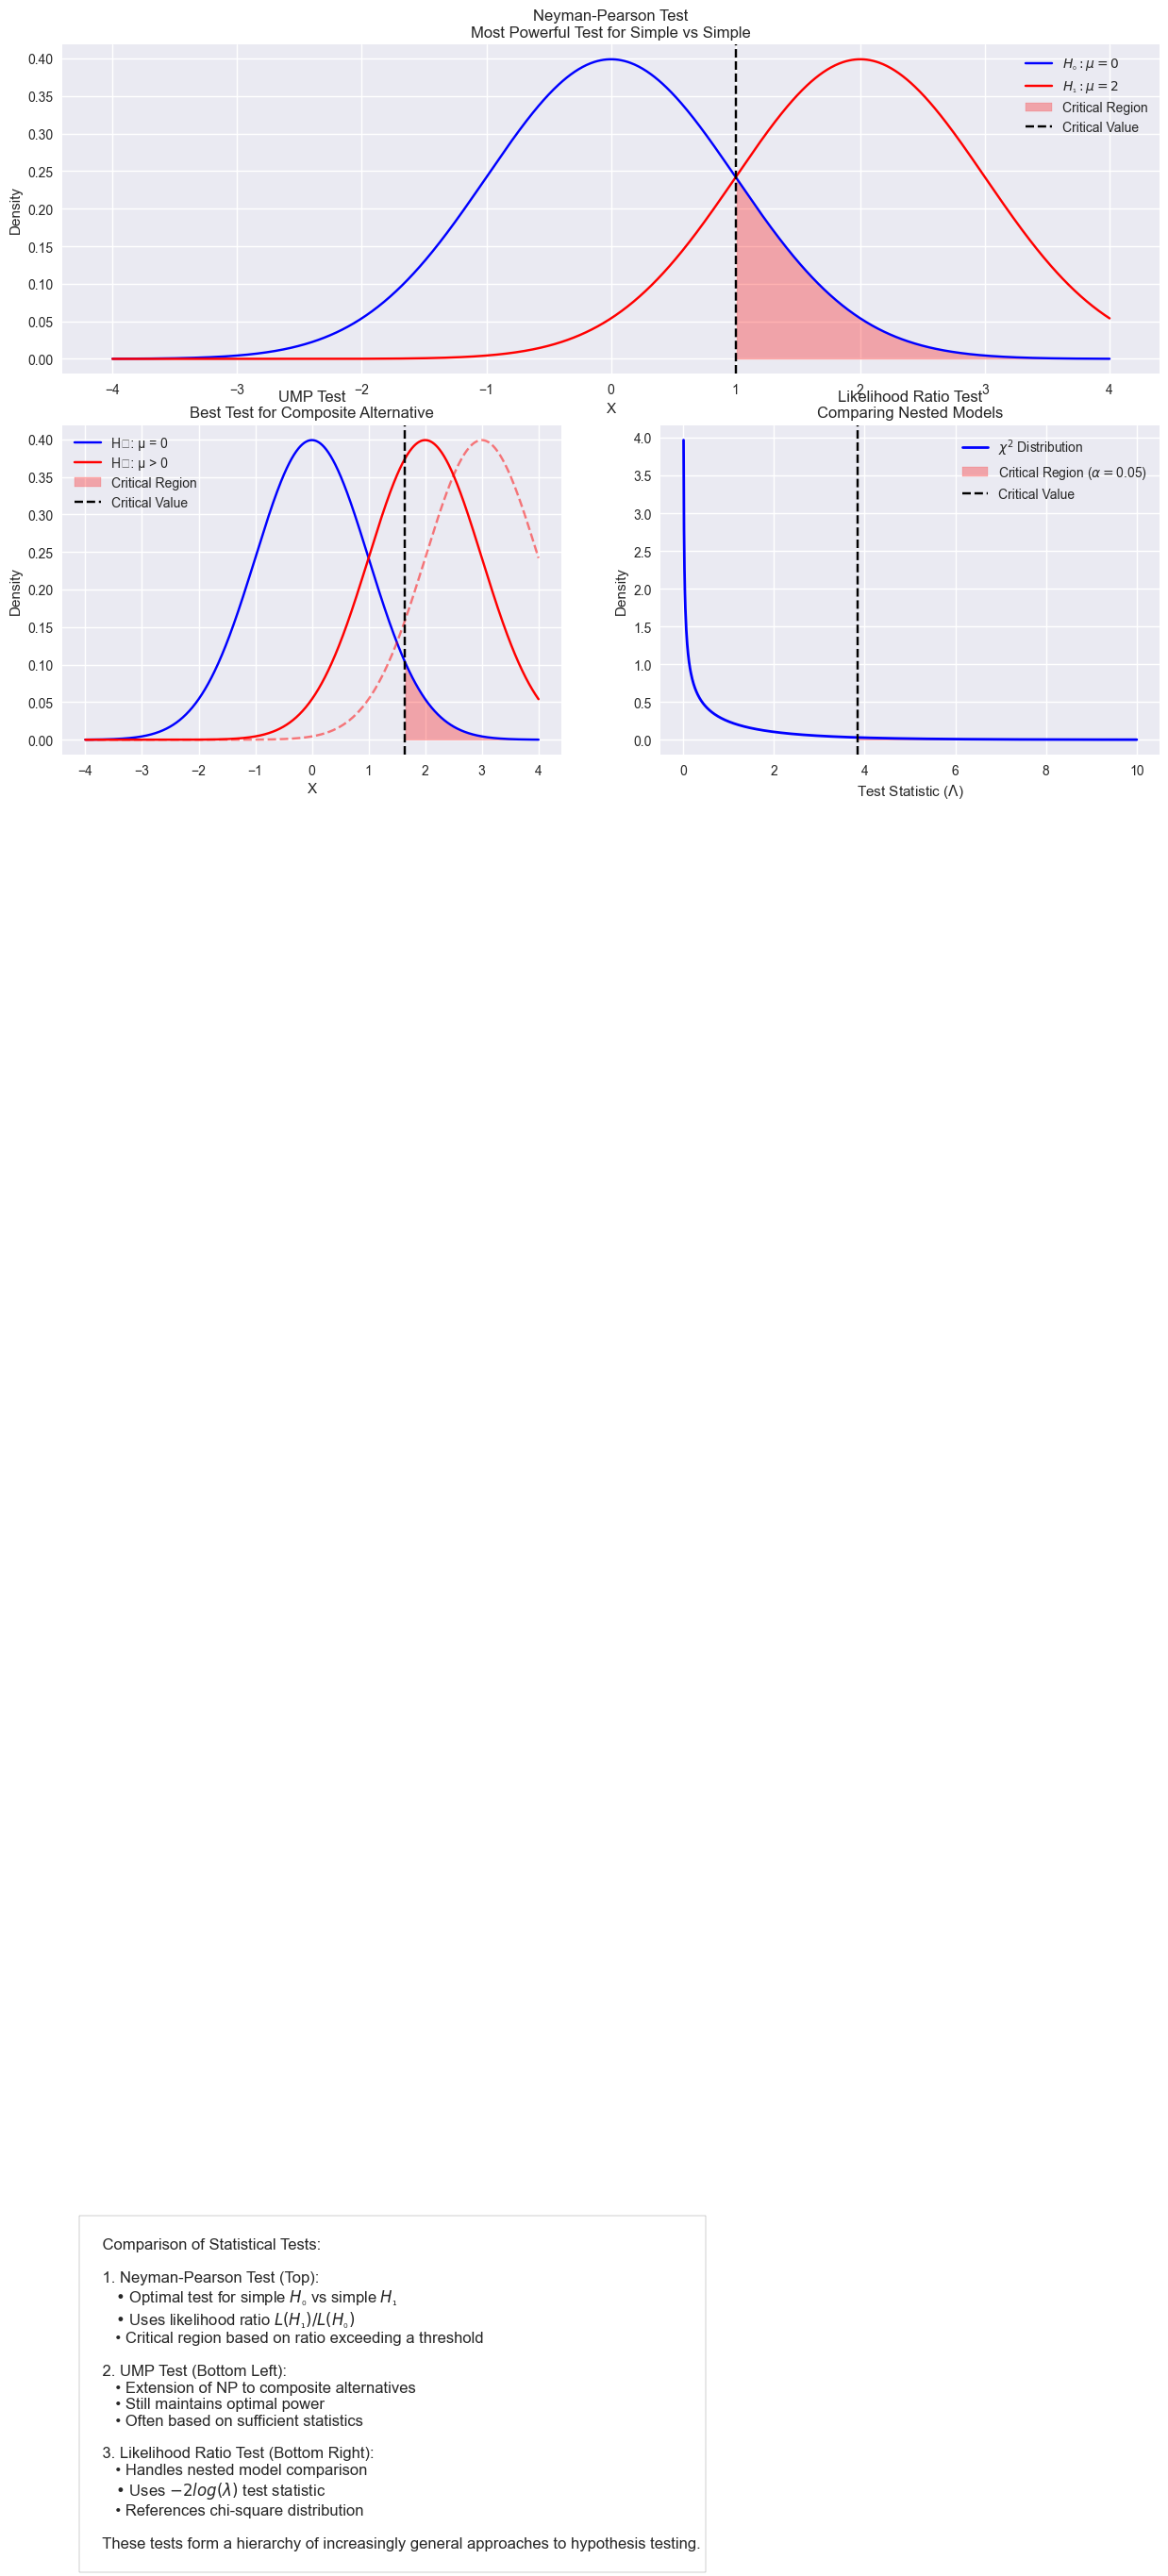

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

def plot_normal_test_example():
    """
    Creates visualization for comparing tests in normal distribution context
    """
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 12))
    gs = fig.add_gridspec(3, 2, height_ratios=[3, 3, 1])
    ax1 = fig.add_subplot(gs[0, :])  # NP test
    ax2 = fig.add_subplot(gs[1, 0])  # UMP test
    ax3 = fig.add_subplot(gs[1, 1])  # LRT
    ax_text = fig.add_subplot(gs[2, :])  # Explanatory text
    
    # Generate data for plots
    x = np.linspace(-4, 4, 1000)
    
    # Plot for Neyman-Pearson test
    mu0, mu1 = 0, 2  # Hypothesized values
    sigma = 1
    y0 = stats.norm.pdf(x, mu0, sigma)
    y1 = stats.norm.pdf(x, mu1, sigma)
    
    ax1.plot(x, y0, 'b-', label='$H_₀: μ = 0$')
    ax1.plot(x, y1, 'r-', label='$H_₁: μ = 2$')
    
    # Add critical region
    critical_value = (mu0 + mu1)/2
    ax1.fill_between(x[x > critical_value], y0[x > critical_value], 
                     alpha=0.3, color='red', label='Critical Region')
    ax1.axvline(x=critical_value, color='black', linestyle='--', 
                label='Critical Value')
    
    ax1.set_title('Neyman-Pearson Test\nMost Powerful Test for Simple vs Simple')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Density')
    ax1.legend()
    
    # Plot for UMP test
    y0 = stats.norm.pdf(x, mu0, sigma)
    y2 = stats.norm.pdf(x, 3, sigma)  # Another alternative
    
    ax2.plot(x, y0, 'b-', label='H₀: μ = 0')
    ax2.plot(x, y1, 'r-', label='H₁: μ > 0')
    ax2.plot(x, y2, 'r--', alpha=0.5)
    
    # Add critical region
    critical_value_ump = stats.norm.ppf(0.95, mu0, sigma)
    ax2.fill_between(x[x > critical_value_ump], y0[x > critical_value_ump], 
                     alpha=0.3, color='red', label='Critical Region')
    ax2.axvline(x=critical_value_ump, color='black', linestyle='--', 
                label='Critical Value')
    
    ax2.set_title('UMP Test\nBest Test for Composite Alternative')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Density')
    ax2.legend()
    
    # Plot for LRT
    # Create chi-square distribution for LRT
    x_lrt = np.linspace(0, 10, 1000)
    chi2_dist = stats.chi2.pdf(x_lrt, df=1)
    
    ax3.plot(x_lrt, chi2_dist, 'b-', lw=2, label='$χ^2$ Distribution')
    
    # Add critical region
    alpha = 0.05
    critical_value_lrt = stats.chi2.ppf(1 - alpha, df=1)
    critical_x = x_lrt[x_lrt >= critical_value_lrt]
    critical_y = stats.chi2.pdf(critical_x, df=1)
    ax3.fill_between(critical_x, critical_y, alpha=0.3, color='red',
                     label=f'Critical Region ($α=${alpha})')
    
    ax3.axvline(x=critical_value_lrt, color='black', linestyle='--',
                label=f'Critical Value')
    
    ax3.set_title('Likelihood Ratio Test\nComparing Nested Models')
    ax3.set_xlabel('Test Statistic ($Λ$)')
    ax3.set_ylabel('Density')
    ax3.legend()
    
    # Add explanatory text
    explanation = """
    Comparison of Statistical Tests:
    
    1. Neyman-Pearson Test (Top):
       • Optimal test for simple $H_₀$ vs simple $H_₁$
       • Uses likelihood ratio $L(H_₁)/L(H_₀)$
       • Critical region based on ratio exceeding a threshold
    
    2. UMP Test (Bottom Left):
       • Extension of NP to composite alternatives
       • Still maintains optimal power
       • Often based on sufficient statistics
    
    3. Likelihood Ratio Test (Bottom Right):
       • Handles nested model comparison
       • Uses $-2log(λ)$ test statistic
       • References chi-square distribution
       
    These tests form a hierarchy of increasingly general approaches to hypothesis testing.
    """
    ax_text.axis('off')
    ax_text.text(0.02, -5, explanation, fontsize=12,
                bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
    
    plt.tight_layout()
    return fig

# Generate visualization
fig = plot_normal_test_example()
plt.show()